In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [14]:
df_standardised = pd.read_csv('../gait_standardised.csv')
df_standardised.head()

,subject,condition,replication,leg,joint,time,angle,angle_scaled
0,1,1,1,1,1,NaN,4.682881,-0.465902
1,1,1,1,1,1,1.0,5.073127,-0.441551
2,1,1,1,1,1,2.0,5.229774,-0.431776
3,1,1,1,1,1,3.0,5.083273,-0.440918
4,1,1,1,1,1,4.0,4.652399,-0.467804


In [15]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
kf.get_n_splits(df_standardised)

10

In [16]:
def calculate_score(model, X, y):
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

scores = []

In [17]:
for i, (train_index, test_index) in enumerate(kf.split(df_standardised)):
    print(f"Fold {i}:")
     
    X_Train = df_standardised.loc[train_index, ['subject','condition','replication','leg','joint']]
    Y_Train = df_standardised.loc[train_index, 'angle_scaled']

    X_Test = df_standardised.loc[test_index, ['subject','condition','replication','leg','joint']]
    Y_Test = df_standardised.loc[test_index, 'angle_scaled']
    
    model = GradientBoostingRegressor()
    model.fit(X_Train, Y_Train)
    
    score = calculate_score(model, X_Test, Y_Test)
    scores.append(score)
    
    print(f"Score: {score}")

Fold 0:
Score: 0.7480781085678552
Fold 1:
Score: 0.7234890950517976
Fold 2:
Score: 0.7333053319774302
Fold 3:
Score: 0.7289134411142737
Fold 4:
Score: 0.7428984418176603
Fold 5:
Score: 0.7392730546881848
Fold 6:
Score: 0.7219580841545649
Fold 7:
Score: 0.7310754968689299
Fold 8:
Score: 0.7361143466958024
Fold 9:
Score: 0.7311660597776947


In [18]:
df_scores = pd.DataFrame({'Fold': range(1, len(scores)+1), 'Score': scores})

In [19]:
print(df_scores)

   Fold     Score
0     1  0.748078
1     2  0.723489
2     3  0.733305
3     4  0.728913
4     5  0.742898
5     6  0.739273
6     7  0.721958
7     8  0.731075
8     9  0.736114
9    10  0.731166


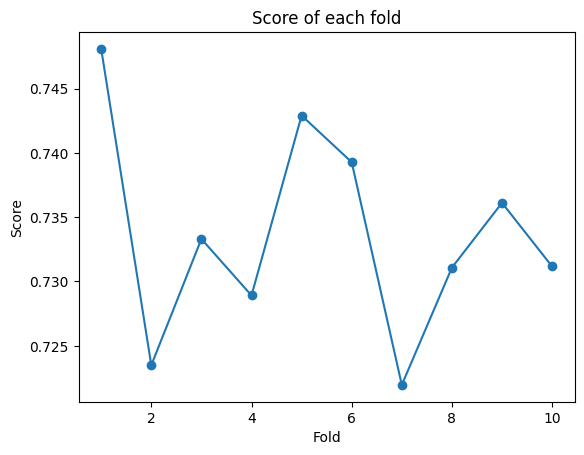

In [20]:
plt.plot(df_scores['Fold'], df_scores['Score'], marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Score of each fold')
plt.show()

In [21]:
mean_score = np.mean(scores)
print(f"Mean score: {mean_score}")

Mean score: 0.7336271460714194
